In [1]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. Постройте гистограмму
# 3. Реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. Реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

plt.set_cmap("gray")

<Figure size 640x480 with 0 Axes>

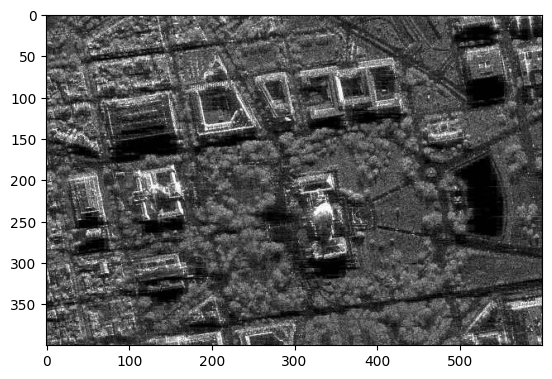

In [3]:
gray_image = cv2.imread("./sar_1_gray.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_image)

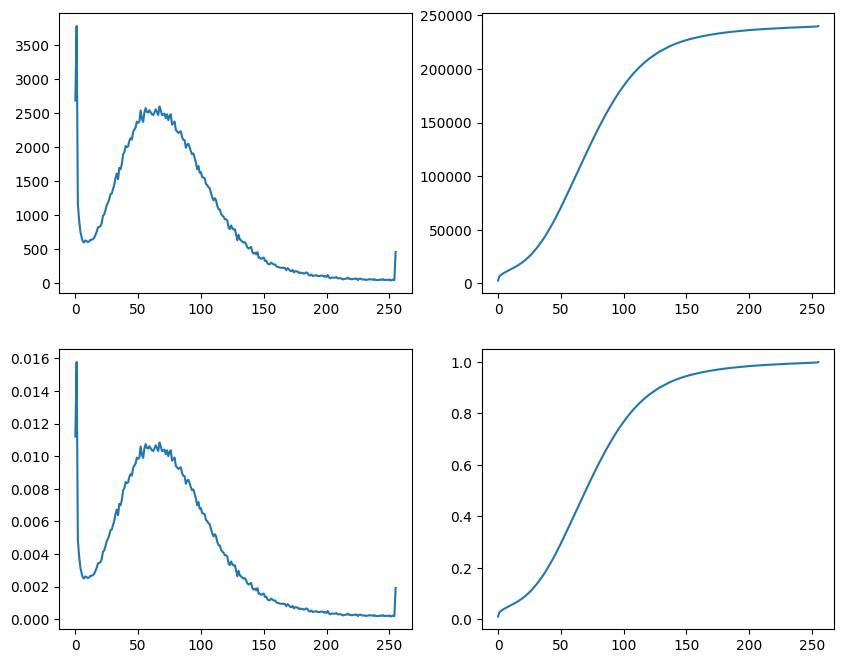

In [14]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([gray_image], [0], None, [histSize], histRange, accumulate=accumulate)
b_hist_cum = b_hist.cumsum()
b_hist_norm = b_hist /  (gray_image.shape[0] * gray_image.shape[1])
b_hist_norm_cum = b_hist_norm.cumsum()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 8))
axes[0, 0].plot(b_hist)
axes[0, 1].plot(b_hist_cum)
axes[1, 0].plot(b_hist_norm)
axes[1, 1].plot(b_hist_norm_cum)

Text(0.5, 1.0, 'Gamma = 1.5')

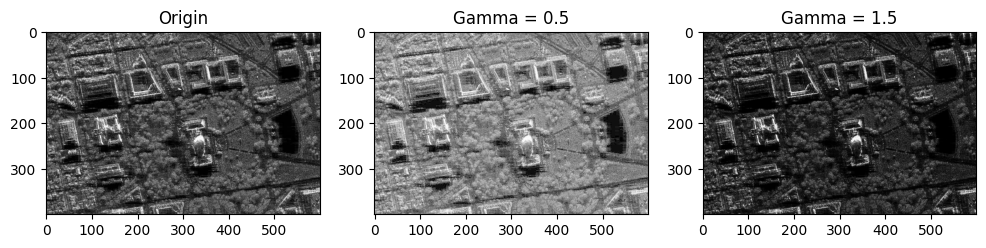

In [9]:
def adjust_gamma(image, gamma=1.0):
	table = np.array([((i / 255.0) ** gamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	return cv2.LUT(image, table)

gamma_img_1 = adjust_gamma(gray_image, 0.5)
gamma_img_2 = adjust_gamma(gray_image, 1.5)
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(12, 10))
axes[0].imshow(gray_image)
axes[1].imshow(gamma_img_1)
axes[2].imshow(gamma_img_2)
axes[0].set_title("Origin")
axes[1].set_title("Gamma = 0.5")
axes[2].set_title("Gamma = 1.5")

In [10]:
ssim_1, _ = structural_similarity(gray_image, gamma_img_1, full=True)
mse_1 = mean_squared_error(gray_image, gamma_img_1)
ssim_2, _ = structural_similarity(gray_image, gamma_img_2, full=True)
mse_2 = mean_squared_error(gray_image, gamma_img_2)

print(f"For Gamma=0.5:\n{ssim_1=}\n{mse_1=}\n")
print(f"For Gamma=1.5:\n{ssim_2=}\n{mse_2=}")

For Gamma=0.5:
ssim_1=0.7875008686792753
mse_1=3250.429145833333

For Gamma=1.5:
ssim_2=0.8065788107754002
mse_2=971.8206541666667


Text(0.5, 1.0, 'Statistical color correction')

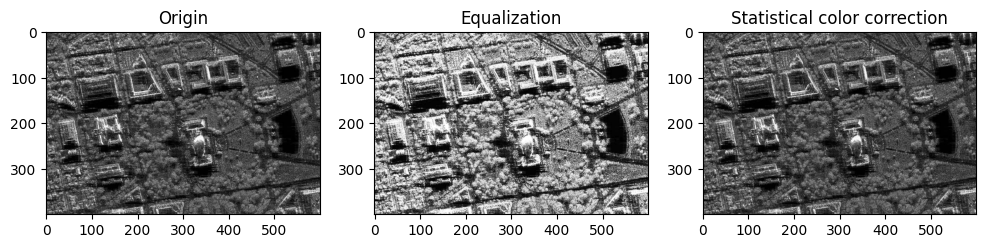

In [11]:
eq_gray_image = cv2.equalizeHist(gray_image)
statistic_gray_image = eq_gray_image.mean() + (gray_image-gray_image.mean())*eq_gray_image.std()/gray_image.std()

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(12, 10))
axes[0].imshow(gray_image)
axes[1].imshow(eq_gray_image)
axes[2].imshow(statistic_gray_image)
axes[0].set_title("Origin")
axes[1].set_title("Equalization")
axes[2].set_title("Statistical color correction")

Text(0.5, 1.0, 'Threshold to zero')

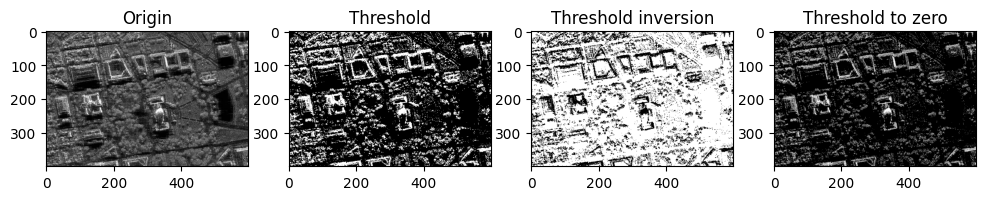

In [12]:
_, thresh1 = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(gray_image, 100, 255, cv2.THRESH_TOZERO)

fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(12, 10))
axes[0].imshow(gray_image)
axes[1].imshow(thresh1)
axes[2].imshow(thresh2)
axes[3].imshow(thresh3)
axes[0].set_title("Origin")
axes[1].set_title("Threshold")
axes[2].set_title("Threshold inversion")
axes[3].set_title("Threshold to zero")